# B2: TCA 13C MFA demo

# Intro

# Setup

First, we need to set the path and environment variable properly:

In [1]:
quantmodelDir = '/users/hgmartin/libraries/quantmodel'

This is the only place where the jQMM library path needs to be set.

In [2]:
%matplotlib inline

import sys, os
pythonPath = quantmodelDir+"/code/core"
if pythonPath not in sys.path:
    sys.path.append(pythonPath)
os.environ["QUANTMODELPATH"] = quantmodelDir

In [3]:
%matplotlib inline
import os, core, FluxModels, unittest, enhancedLists
from IPython.display import SVG, Image

And move to a scratch directory (to make things faster):

In [4]:
cd /scratch/hgmartin_scratch/tests

/scratch/hgmartin_scratch/tests


# Assembling SBML file

Get file names needed to produce sbml file:

In [5]:
qmodeldir         = os.environ['QUANTMODELPATH']    
dirDATA           = qmodeldir+'/data/tests/TCAtoy/' 


REACTIONSfilename   = dirDATA+'REACTIONStca.txt' 
FEEDfilename        = dirDATA+'FEEDtca.txt'
CEMSfilename        = dirDATA+'GCMStca.txt'
CEMSSTDfilename     = dirDATA+'GCMSerrtca.txt'
FLUXESFreefilename  = dirDATA+'FLUXtca.txt'

Assemble sbml file:

In [6]:
atomTransitions = enhancedLists.AtomTransitionList(REACTIONSfilename)
ReacNet = ReactionNetworks.C13ReactionNetwork(atomTransitions.getReactionNetwork('E. coli wt5h 13C MFA'))

ReacNet.addLabeling(CEMSfilename,'LCMSLabelData',CEMSSTDfilename,minSTD=0.001)
ReacNet.addFeed(FEEDfilename)
ReacNet.loadFluxBounds(FLUXESFreefilename)

ReacNet.write('TCA.sbml')  

1

# Flux calculation

Load sbml file into model:

In [7]:
C13model = FluxModels.C13Model('TCA.sbml')   

Calculate fluxes:

In [8]:
%%time
results    = C13model.findFluxesStds(Nrep=10, procString='proc', erase=False)

CPU times: user 1.04 s, sys: 1 s, total: 2.05 s
Wall time: 4.65 s


Plot results:

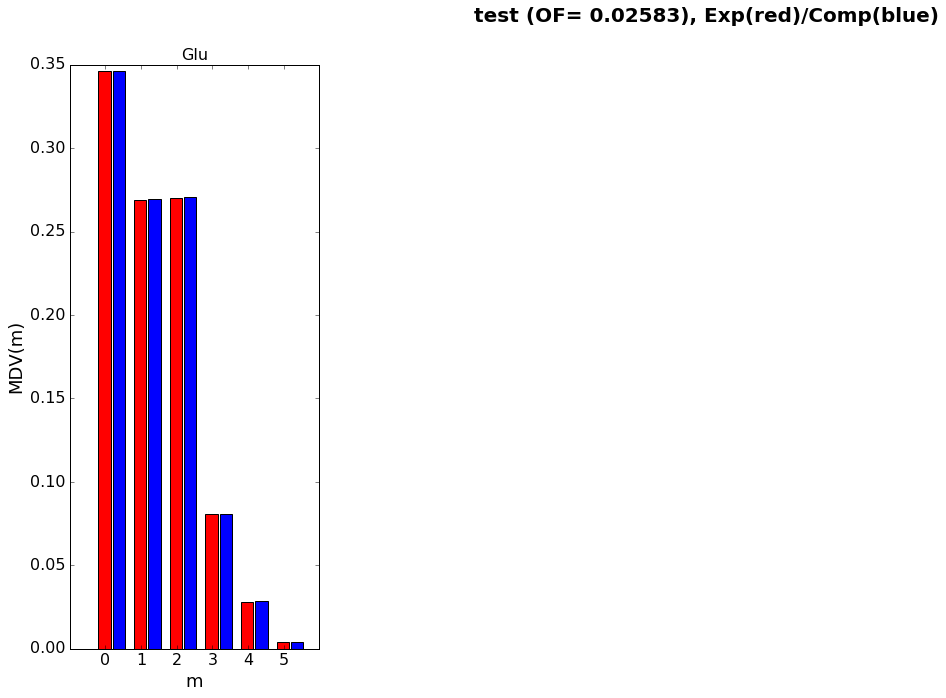

In [9]:
results.plotExpvsCompLabelFragment(titleFig='test',save="fitTest.eps")

In [10]:
print 'Fit:' +str(results.EMUlabel['Glu'])
print 'Exp:' +str(results.fragDict['Glu'].mdv)

Fit:[ 0.34635  0.26953  0.27083  0.08073  0.02865  0.00391]
Exp:[ 0.346  0.269  0.27   0.081  0.028  0.004]


In [11]:
results.reactionNetwork.reactionList.printFluxes(brief="False")

co2Out: 	150.0
r6: 	125.0
r1: 	100.0
r2: 	100.0
r7: 	75.0
r4: 	50.0
r5: 	50.0
r3: 	50.0
r8: 	50.0


# Comparison with 13CFLUX2

We now compare these results with those obtained through 13CFLUX2, a well known package for $^{13}$C Metabolic Flux Analysis. The results of this calculation are equivalent. The commands to run this simulation (files included in library in the TCA example folder, 13CFLUX2 license required) are:

./fwdsim.py -i Ecoli/TCAexample.fml

And the results are equivalent to those above:

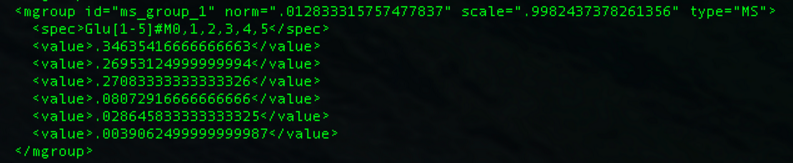

In [12]:
Image(os.environ["QUANTMODELPATH"]+"/data/tests/TCAtoy/13CFLUX2/OutputFig.png")

fit: [0.34635 0.26953 0.27083 0.08072 0.02864 0.03906]

# References

Weitzel, Michael, et al. "13CFLUX2—high-performance software suite for 13C-metabolic flux analysis." Bioinformatics 29.1 (2013): 143-145.
APA	
